In [1]:
##Importing all modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import ensemble
import pickle
df=pd.read_csv("coronadataset.csv")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df[:4] ##Glimpse of the dataset

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30-04-2020,0,0,0,0,0,negative,None,female,Other
1,30-04-2020,1,0,0,0,0,negative,None,female,Other
2,30-04-2020,0,1,0,0,0,negative,None,male,Other
3,30-04-2020,1,0,0,0,0,negative,None,female,Other


In [3]:
for col in df:
    print(col," : ",df[col].dtype) ##checking datatype of all the columns in the dataset

test_date  :  object
cough  :  object
fever  :  object
sore_throat  :  object
shortness_of_breath  :  object
head_ache  :  object
corona_result  :  object
age_60_and_above  :  object
gender  :  object
test_indication  :  object


In [4]:
for col in df:
    print(col)
    print(df[col].value_counts()) ##Distribution in % of all the values of all columns in the dataset
    print()

test_date
20-04-2020    10786
19-04-2020    10028
22-04-2020     9530
21-04-2020     9492
16-04-2020     8999
23-04-2020     8590
01-04-2020     8476
13-04-2020     8201
02-04-2020     8004
03-04-2020     7907
17-04-2020     7546
05-04-2020     7359
27-04-2020     7200
30-04-2020     7188
15-04-2020     7034
31-03-2020     6953
24-04-2020     6912
26-03-2020     6555
14-04-2020     6410
28-04-2020     6249
18-04-2020     6209
26-04-2020     6052
27-03-2020     5846
12-04-2020     5833
07-04-2020     5748
30-03-2020     5746
10-04-2020     5561
28-03-2020     5490
25-03-2020     5415
06-04-2020     5219
29-03-2020     5161
25-04-2020     4983
04-04-2020     4949
24-03-2020     4669
09-04-2020     4452
11-04-2020     4237
29-04-2020     4210
08-04-2020     3973
22-03-2020     3524
23-03-2020     3413
19-03-2020     2213
18-03-2020     1960
20-03-2020     1842
21-03-2020     1585
17-03-2020     1441
16-03-2020     1276
15-03-2020      968
13-03-2020      672
12-03-2020      621
14-03-2020

In [5]:
for col in df:
    print(col)
    print(df[col].value_counts()) ##Checking for no of values for each column 
    print()

test_date
20-04-2020    10786
19-04-2020    10028
22-04-2020     9530
21-04-2020     9492
16-04-2020     8999
23-04-2020     8590
01-04-2020     8476
13-04-2020     8201
02-04-2020     8004
03-04-2020     7907
17-04-2020     7546
05-04-2020     7359
27-04-2020     7200
30-04-2020     7188
15-04-2020     7034
31-03-2020     6953
24-04-2020     6912
26-03-2020     6555
14-04-2020     6410
28-04-2020     6249
18-04-2020     6209
26-04-2020     6052
27-03-2020     5846
12-04-2020     5833
07-04-2020     5748
30-03-2020     5746
10-04-2020     5561
28-03-2020     5490
25-03-2020     5415
06-04-2020     5219
29-03-2020     5161
25-04-2020     4983
04-04-2020     4949
24-03-2020     4669
09-04-2020     4452
11-04-2020     4237
29-04-2020     4210
08-04-2020     3973
22-03-2020     3524
23-03-2020     3413
19-03-2020     2213
18-03-2020     1960
20-03-2020     1842
21-03-2020     1585
17-03-2020     1441
16-03-2020     1276
15-03-2020      968
13-03-2020      672
12-03-2020      621
14-03-2020

# EDA

In [6]:
df.isna().sum() ##Checking for NULL value

test_date              5286
cough                  5286
fever                  5286
sore_throat            5286
shortness_of_breath    5286
head_ache              5286
corona_result          5286
age_60_and_above       5286
gender                 5286
test_indication        5286
dtype: int64

In [7]:
df.shape ##No of rows and columns in the dataset

(278848, 10)

In [8]:
round((df['corona_result'].value_counts()/df.shape[0]),2) ##Distribution in % of target column values in the dataset

negative    0.93
positive    0.03
other       0.01
Name: corona_result, dtype: float64

In [9]:
df.shape ##Total no. of rows and columns

(278848, 10)

In [10]:
df = df.dropna() ##Dropping all the NULL values from the dataset

In [11]:
df.shape

(273562, 10)

In [12]:
for col in df:
    print(col," : ",df[col].unique()) ##Checking for all unique values

test_date  :  ['30-04-2020' '29-04-2020' '28-04-2020' '27-04-2020' '26-04-2020'
 '25-04-2020' '24-04-2020' '23-04-2020' '22-04-2020' '21-04-2020'
 '20-04-2020' '19-04-2020' '18-04-2020' '17-04-2020' '16-04-2020'
 '15-04-2020' '14-04-2020' '13-04-2020' '12-04-2020' '11-04-2020'
 '10-04-2020' '09-04-2020' '08-04-2020' '07-04-2020' '06-04-2020'
 '05-04-2020' '04-04-2020' '03-04-2020' '02-04-2020' '01-04-2020'
 '31-03-2020' '30-03-2020' '29-03-2020' '28-03-2020' '27-03-2020'
 '26-03-2020' '25-03-2020' '24-03-2020' '23-03-2020' '22-03-2020'
 '21-03-2020' '20-03-2020' '19-03-2020' '18-03-2020' '17-03-2020'
 '16-03-2020' '15-03-2020' '14-03-2020' '13-03-2020' '12-03-2020'
 '11-03-2020']
cough  :  [0.0 1.0 '0' '1' 'None']
fever  :  [0.0 1.0 '0' '1' 'None']
sore_throat  :  [0.0 1.0 '0' '1' 'None']
shortness_of_breath  :  [0.0 1.0 '0' '1' 'None']
head_ache  :  [0.0 1.0 '0' '1' 'None']
corona_result  :  ['negative' 'positive' 'other']
age_60_and_above  :  ['None' 'Yes' 'No']
gender  :  ['female' 

In [13]:
for col in df:
    print(col," : ",df[col].dtype) ##Checking for datatype of all columns

test_date  :  object
cough  :  object
fever  :  object
sore_throat  :  object
shortness_of_breath  :  object
head_ache  :  object
corona_result  :  object
age_60_and_above  :  object
gender  :  object
test_indication  :  object


In [14]:
for col in df:
    df.drop(df.index[df[col ] == 'None'], inplace = True) ##Dropping 'NONE' value from the dataset

In [15]:
for col in df:
    print(col," : ",df[col].nunique()) #checking for no of unique values

test_date  :  24
cough  :  4
fever  :  4
sore_throat  :  4
shortness_of_breath  :  4
head_ache  :  4
corona_result  :  3
age_60_and_above  :  2
gender  :  2
test_indication  :  3


In [16]:
df.drop(df.index[df['corona_result' ] == 'other'], inplace = True) ##Dropping 'NONE' value from the target column

In [17]:
df= df.drop('test_date',axis=1) ##Dropping 'test_date' as a column from the dataset

In [18]:
for col in df:
    print(col," : ",df[col].nunique())

cough  :  4
fever  :  4
sore_throat  :  4
shortness_of_breath  :  4
head_ache  :  4
corona_result  :  2
age_60_and_above  :  2
gender  :  2
test_indication  :  3


In [19]:
for col in df:
    print(col," : ",df[col].unique())

cough  :  [1.0 0.0 '0' '1']
fever  :  [0.0 1.0 '0' '1']
sore_throat  :  [0.0 1.0 '0' '1']
shortness_of_breath  :  [0.0 1.0 '0' '1']
head_ache  :  [0.0 1.0 '0' '1']
corona_result  :  ['negative' 'positive']
age_60_and_above  :  ['Yes' 'No']
gender  :  ['male' 'female']
test_indication  :  ['Other' 'Abroad' 'Contact with confirmed']


In [20]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print()

cough
0      102034
1       23263
0.0      6250
1.0      1588
Name: cough, dtype: int64

fever
0      113335
1       11962
0.0      7139
1.0       699
Name: fever, dtype: int64

sore_throat
0.0    128840
0        2822
1.0      1430
1          43
Name: sore_throat, dtype: int64

shortness_of_breath
0.0    129243
0        2831
1.0      1027
1          34
Name: shortness_of_breath, dtype: int64

head_ache
0.0    128263
0        2797
1.0      2007
1          68
Name: head_ache, dtype: int64

corona_result
negative    125668
positive      7467
Name: corona_result, dtype: int64

age_60_and_above
No     110066
Yes     23069
Name: age_60_and_above, dtype: int64

gender
male      67426
female    65709
Name: gender, dtype: int64

test_indication
Other                     113080
Abroad                     14275
Contact with confirmed      5780
Name: test_indication, dtype: int64



In [21]:
##Changing from object to integer datatype
df['cough']=df['cough'].astype(int)
df['fever']=df['fever'].astype(int)
df['sore_throat']=df['sore_throat'].astype(int)
df['shortness_of_breath']=df['shortness_of_breath'].astype(int)
df['head_ache']=df['head_ache'].astype(int)

In [22]:
for col in df:
    print(col," : ",df[col].unique())

cough  :  [1 0]
fever  :  [0 1]
sore_throat  :  [0 1]
shortness_of_breath  :  [0 1]
head_ache  :  [0 1]
corona_result  :  ['negative' 'positive']
age_60_and_above  :  ['Yes' 'No']
gender  :  ['male' 'female']
test_indication  :  ['Other' 'Abroad' 'Contact with confirmed']


In [23]:
for col in df:
    print(col," : ",df[col].dtype)

cough  :  int32
fever  :  int32
sore_throat  :  int32
shortness_of_breath  :  int32
head_ache  :  int32
corona_result  :  object
age_60_and_above  :  object
gender  :  object
test_indication  :  object


In [24]:
for col in df:
    print(col," : ",df[col].nunique())

cough  :  2
fever  :  2
sore_throat  :  2
shortness_of_breath  :  2
head_ache  :  2
corona_result  :  2
age_60_and_above  :  2
gender  :  2
test_indication  :  3


In [25]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print()

cough
0    108284
1     24851
Name: cough, dtype: int64

fever
0    120474
1     12661
Name: fever, dtype: int64

sore_throat
0    131662
1      1473
Name: sore_throat, dtype: int64

shortness_of_breath
0    132074
1      1061
Name: shortness_of_breath, dtype: int64

head_ache
0    131060
1      2075
Name: head_ache, dtype: int64

corona_result
negative    125668
positive      7467
Name: corona_result, dtype: int64

age_60_and_above
No     110066
Yes     23069
Name: age_60_and_above, dtype: int64

gender
male      67426
female    65709
Name: gender, dtype: int64

test_indication
Other                     113080
Abroad                     14275
Contact with confirmed      5780
Name: test_indication, dtype: int64



In [26]:
##Dropping records with 'corona_result'= "positive", 'cough'= 1 & others 0
df.drop(df[(df['corona_result'] =="positive") & (df['cough'] ==1) & (df['fever'] ==0) & 
           (df['sore_throat'] ==0) & (df['shortness_of_breath'] ==0) & (df['head_ache'] == 0  )].index, inplace = True)

In [27]:
df.shape

(131651, 9)

In [28]:
##Dropping records with 'corona_result'= "positive", 'fever'= 1 & others 0
df.drop(df[(df['corona_result'] =="positive") & (df['cough'] ==0) & (df['fever'] ==1) & 
           (df['sore_throat'] ==0) & (df['shortness_of_breath'] ==0) & (df['head_ache'] == 0  )].index, inplace = True)

In [29]:
df.shape

(130577, 9)

In [30]:
##Dropping records with 'corona_result'= "positive", 'sore_throat'= 1 & others 0
df.drop(df[(df['corona_result'] =="positive") & (df['cough'] ==0) & (df['fever'] ==0) & 
           (df['sore_throat'] ==1) & (df['shortness_of_breath'] ==0) & (df['head_ache'] == 0  )].index, inplace = True)

In [31]:
df.shape

(130399, 9)

In [32]:
##Dropping records with 'corona_result'= "positive", 'shortness_of_breath'= 1 & others 0
df.drop(df[(df['corona_result'] =="positive") & (df['cough'] ==0) & (df['fever'] ==0) & 
           (df['sore_throat'] ==0) & (df['shortness_of_breath'] ==1) & (df['head_ache'] == 0  )].index, inplace = True)

In [33]:
df.shape

(130285, 9)

In [34]:
##Dropping records with 'corona_result'= "positive", 'head_ache'= 1 & others 0
df=df.drop(df[(df['corona_result'] =="positive") & (df['cough'] ==0) & (df['fever'] ==0) & 
              (df['sore_throat'] ==0) & (df['shortness_of_breath'] ==0) & (df['head_ache'] == 1 )].index, inplace = False)

In [35]:
df.shape

(129983, 9)

In [36]:
for col in df:
    print('value_counts')
    print()
    print(col)
    print(df[col].value_counts())
    print('nunique')
    print()
    print(col," : ",df[col].nunique())
    print('dtype')
    print()
    print(col," : ",df[col].dtype)
    print()

value_counts

cough
0    106616
1     23367
Name: cough, dtype: int64
nunique

cough  :  2
dtype

cough  :  int32

value_counts

fever
0    118396
1     11587
Name: fever, dtype: int64
nunique

fever  :  2
dtype

fever  :  int32

value_counts

sore_throat
0    128688
1      1295
Name: sore_throat, dtype: int64
nunique

sore_throat  :  2
dtype

sore_throat  :  int32

value_counts

shortness_of_breath
0    129036
1       947
Name: shortness_of_breath, dtype: int64
nunique

shortness_of_breath  :  2
dtype

shortness_of_breath  :  int32

value_counts

head_ache
0    128210
1      1773
Name: head_ache, dtype: int64
nunique

head_ache  :  2
dtype

head_ache  :  int32

value_counts

corona_result
negative    125668
positive      4315
Name: corona_result, dtype: int64
nunique

corona_result  :  2
dtype

corona_result  :  object

value_counts

age_60_and_above
No     107516
Yes     22467
Name: age_60_and_above, dtype: int64
nunique

age_60_and_above  :  2
dtype

age_60_and_above  :  object

val

In [37]:
for col in df:
    print(col)
    print(df[col].value_counts()/df.shape[0])
    print()

cough
0    0.82023
1    0.17977
Name: cough, dtype: float64

fever
0    0.910858
1    0.089142
Name: fever, dtype: float64

sore_throat
0    0.990037
1    0.009963
Name: sore_throat, dtype: float64

shortness_of_breath
0    0.992714
1    0.007286
Name: shortness_of_breath, dtype: float64

head_ache
0    0.98636
1    0.01364
Name: head_ache, dtype: float64

corona_result
negative    0.966803
positive    0.033197
Name: corona_result, dtype: float64

age_60_and_above
No     0.827154
Yes    0.172846
Name: age_60_and_above, dtype: float64

gender
male      0.505135
female    0.494865
Name: gender, dtype: float64

test_indication
Other                     0.861759
Abroad                    0.106029
Contact with confirmed    0.032212
Name: test_indication, dtype: float64



## Analyzing target column

<AxesSubplot:xlabel='corona_result', ylabel='count'>

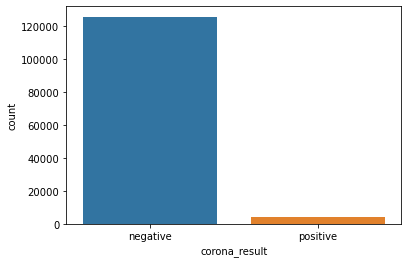

In [38]:
sns.countplot(x="corona_result",data=df) 

## Analyzing target column with categorical columns

<AxesSubplot:xlabel='cough', ylabel='count'>

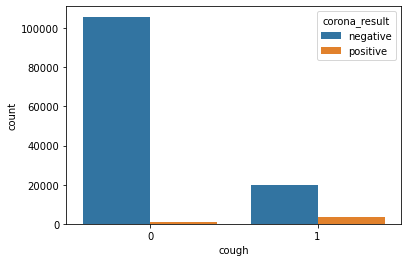

In [39]:
sns.countplot(x="cough",hue="corona_result",data=df)

In [40]:
pd.crosstab(index=df["corona_result"], columns=df["cough"], normalize="index" )

cough,0,1
corona_result,,
negative,0.842649,0.157351
positive,0.167323,0.832677


<AxesSubplot:xlabel='fever', ylabel='count'>

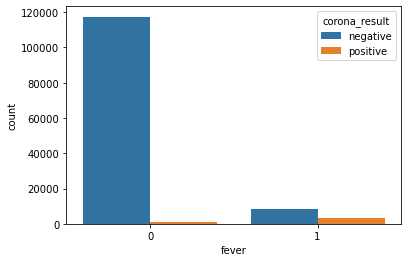

In [41]:
sns.countplot(x="fever",hue="corona_result",data=df)

In [42]:
pd.crosstab(index=df["corona_result"], columns=df["fever"], normalize="index" )

fever,0,1
corona_result,,
negative,0.934653,0.065347
positive,0.217845,0.782155


<AxesSubplot:xlabel='sore_throat', ylabel='count'>

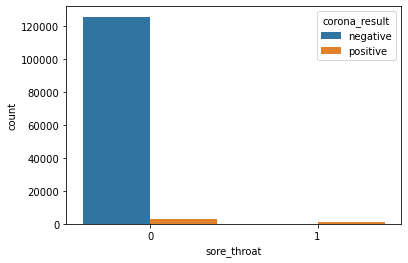

In [43]:
sns.countplot(x="sore_throat",hue="corona_result",data=df)

In [44]:
pd.crosstab(index=df["corona_result"], columns=df["sore_throat"], normalize="index" )

sore_throat,0,1
corona_result,,
negative,0.999069,0.000931
positive,0.726999,0.273001


<AxesSubplot:xlabel='shortness_of_breath', ylabel='count'>

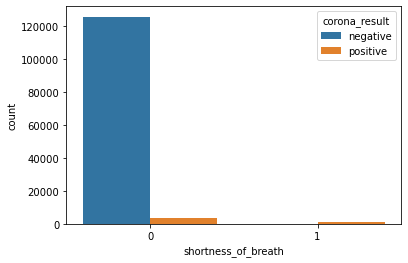

In [45]:
sns.countplot(x="shortness_of_breath",hue="corona_result",data=df)

In [46]:
pd.crosstab(index=df["corona_result"], columns=df["shortness_of_breath"], normalize="index" )

shortness_of_breath,0,1
corona_result,,
negative,0.999316,0.000684
positive,0.800463,0.199537


<AxesSubplot:xlabel='head_ache', ylabel='count'>

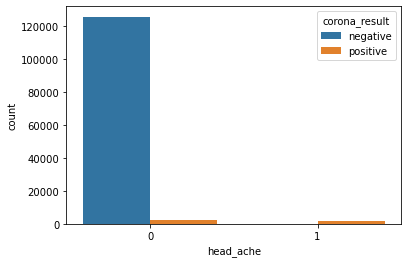

In [47]:
sns.countplot(x="head_ache",hue="corona_result",data=df)

In [48]:
pd.crosstab(index=df["corona_result"], columns=df["head_ache"], normalize="index" )

head_ache,0,1
corona_result,,
negative,0.999355,0.000645
positive,0.607879,0.392121


<AxesSubplot:xlabel='age_60_and_above', ylabel='count'>

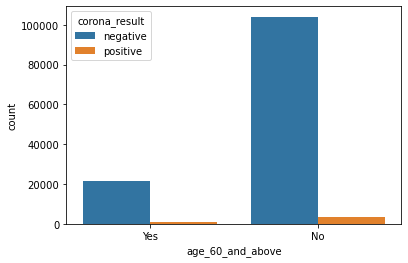

In [49]:
sns.countplot(x="age_60_and_above",hue="corona_result",data=df)

In [50]:
pd.crosstab(index=df["corona_result"], columns=df["age_60_and_above"], normalize="index" )

age_60_and_above,No,Yes
corona_result,,
negative,0.827737,0.172263
positive,0.810197,0.189803


<AxesSubplot:xlabel='gender', ylabel='count'>

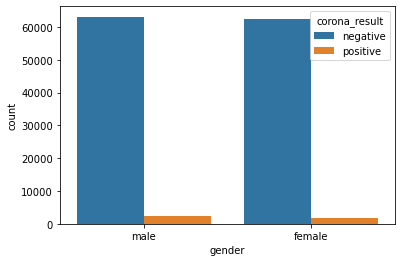

In [51]:
sns.countplot(x="gender",hue="corona_result",data=df)

In [52]:
pd.crosstab(index=df["corona_result"], columns=df["gender"], normalize="index" )

gender,female,male
corona_result,,
negative,0.497565,0.502435
positive,0.416222,0.583778


<AxesSubplot:xlabel='test_indication', ylabel='count'>

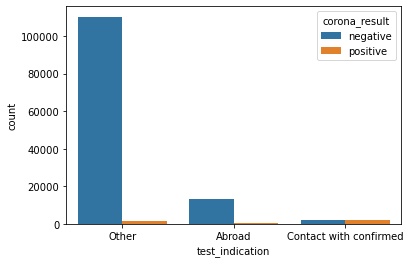

In [53]:
sns.countplot(x="test_indication",hue="corona_result",data=df)

In [54]:
pd.crosstab(index=df["corona_result"], columns=df["test_indication"], normalize="index" )

test_indication,Abroad,Contact with confirmed,Other
corona_result,,,
negative,0.104919,0.017785,0.877296
positive,0.138355,0.452375,0.409270


# Performing OHE

In [55]:
catcols=list(df.select_dtypes(include="object").columns)
xdfohe=pd.get_dummies(df,columns=catcols,drop_first=True)
xdfohe=xdfohe.rename({'test_indication_Contact with confirmed':'test_indication_Contact_with_confirmed'},axis=1)

In [56]:
xdfohe.shape

(129983, 10)

In [57]:
correlation_df = xdfohe.corr() ##Checking correlation
correlation_df 

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result_positive,age_60_and_above_Yes,gender_male,test_indication_Contact_with_confirmed,test_indication_Other
cough,1.000000,0.493721,0.144882,0.132812,0.160682,0.315067,-0.043549,0.020096,0.266921,-0.625899
fever,0.493721,1.000000,0.165709,0.164952,0.234383,0.450663,-0.009980,0.035532,0.240803,-0.384716
sore_throat,0.144882,0.165709,1.000000,0.228230,0.391574,0.490772,-0.013487,-0.007615,0.259854,-0.144305
shortness_of_breath,0.132812,0.164952,0.228230,1.000000,0.252753,0.418893,0.012516,0.005181,0.194949,-0.110626
head_ache,0.160682,0.234383,0.391574,0.252753,1.000000,0.604634,-0.012710,0.000848,0.309871,-0.164665
corona_result_positive,0.315067,0.450663,0.490772,0.418893,0.604634,1.000000,0.008310,0.029147,0.440959,-0.242926
age_60_and_above_Yes,-0.043549,-0.009980,-0.013487,0.012516,-0.012710,0.008310,1.000000,-0.035807,-0.029121,0.066546
gender_male,0.020096,0.035532,-0.007615,0.005181,0.000848,0.029147,-0.035807,1.000000,0.011765,-0.020785
test_indication_Contact_with_confirmed,0.266921,0.240803,0.259854,0.194949,0.309871,0.440959,-0.029121,0.011765,1.000000,-0.455504
test_indication_Other,-0.625899,-0.384716,-0.144305,-0.110626,-0.164665,-0.242926,0.066546,-0.020785,-0.455504,1.000000


In [58]:
correlation_df = (df.corr().stack().sort_values(ascending=False))
correlation_df

head_ache            head_ache              1.000000
shortness_of_breath  shortness_of_breath    1.000000
fever                fever                  1.000000
sore_throat          sore_throat            1.000000
cough                cough                  1.000000
                     fever                  0.493721
fever                cough                  0.493721
sore_throat          head_ache              0.391574
head_ache            sore_throat            0.391574
                     shortness_of_breath    0.252753
shortness_of_breath  head_ache              0.252753
head_ache            fever                  0.234383
fever                head_ache              0.234383
shortness_of_breath  sore_throat            0.228230
sore_throat          shortness_of_breath    0.228230
                     fever                  0.165709
fever                sore_throat            0.165709
shortness_of_breath  fever                  0.164952
fever                shortness_of_breath    0.

In [59]:
correlation_df = (xdfohe.corr().stack().sort_values(ascending=False))
correlation_df=correlation_df.drop_duplicates()
correlation_df

test_indication_Other                   test_indication_Other                     1.000000
head_ache                               corona_result_positive                    0.604634
fever                                   cough                                     0.493721
sore_throat                             corona_result_positive                    0.490772
fever                                   corona_result_positive                    0.450663
test_indication_Contact_with_confirmed  corona_result_positive                    0.440959
corona_result_positive                  shortness_of_breath                       0.418893
sore_throat                             head_ache                                 0.391574
corona_result_positive                  cough                                     0.315067
head_ache                               test_indication_Contact_with_confirmed    0.309871
test_indication_Contact_with_confirmed  cough                                     0.266921

In [60]:
correlation_df.index

MultiIndex([(                 'test_indication_Other', ...),
            (                             'head_ache', ...),
            (                                 'fever', ...),
            (                           'sore_throat', ...),
            (                                 'fever', ...),
            ('test_indication_Contact_with_confirmed', ...),
            (                'corona_result_positive', ...),
            (                           'sore_throat', ...),
            (                'corona_result_positive', ...),
            (                             'head_ache', ...),
            ('test_indication_Contact_with_confirmed', ...),
            ('test_indication_Contact_with_confirmed', ...),
            (                   'shortness_of_breath', ...),
            ('test_indication_Contact_with_confirmed', ...),
            (                                 'fever', ...),
            (                           'sore_throat', ...),
            ('test_indic

# Separating target column

In [61]:
X=xdfohe.drop({"corona_result_positive"}, axis=1)
Y=xdfohe["corona_result_positive"]

# Resampling the Dataset to Balance the values in target column

In [62]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)

In [63]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 125668, 1: 4315})
Resampled dataset shape Counter({0: 125668, 1: 125668})


In [64]:
def printscores(actual,pred):
    print("AUC:",metrics.roc_auc_score(actual,pred))
    print("accuracy:",metrics.accuracy_score(actual,pred))
    print("recall  :",metrics.recall_score(actual,pred))
    print("precision :",metrics.precision_score(actual,pred))
    print("f1-score : ",metrics.f1_score(actual,pred))

# Splitting the data into test and train

In [122]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X_res,y_res,test_size=.3,random_state=42)

# LOGISTIC REGRESSION

In [66]:
from sklearn import linear_model
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain) ##Building model with all columns
testpred=model.predict(Xtest)
trainpred=model.predict(Xtrain)

In [67]:
printscores(ytrain,trainpred)##Checking metrics score with all columns
printscores(ytest,testpred)

AUC: 0.9744665629506819
accuracy: 0.9744394236507801
recall  : 1.0
precision : 0.951315889186
f1-score :  0.9750506255374629
AUC: 0.9742202249581194
accuracy: 0.974284160687524
recall  : 1.0
precision : 0.9511992550273073
f1-score :  0.974989358546055


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifdf = pd.DataFrame() 
vifdf['Features'] = Xtrain.columns
vifdf['VIF'] = [ variance_inflation_factor(Xtrain.values, i) for i in range(Xtrain.shape[1])] ## Checking VIF
vifdf

,Features,VIF
0,cough,2.881371
1,fever,2.696684
2,sore_throat,1.322848
3,shortness_of_breath,1.174443
4,head_ache,1.476592
5,age_60_and_above_Yes,1.227619
6,gender_male,2.050449
7,test_indication_Contact_with_confirmed,1.935935
8,test_indication_Other,1.897644


In [69]:
import statsmodels.api as sm
Xtrainsm=sm.add_constant(Xtrain)
model = sm.GLM(  ytrain ,  Xtrainsm,  family = sm.families.Binomial()) 
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     corona_result_positive   No. Observations:               175935
Model:                                GLM   Df Residuals:                   175925
Model Family:                    Binomial   Df Model:                            9
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -12707.
Date:                    Wed, 08 Jun 2022   Deviance:                       25413.
Time:                            20:48:16   Pearson chi2:                 2.26e+14
No. Iterations:                        12                                         
Covariance Type:                nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -13.4749      0.252    -53.461      0.000     -13.969     -12.981
cough                                      6.6569      0.164     40.560      0.000       6.335       6.979
fever                                      7.1163      0.123     57.820      0.000       6.875       7.357
sore_throat                                9.5262      0.171     55.571      0.000       9.190       9.862
shortness_of_breath                        9.2723      0.181     51.310      0.000       8.918       9.627
head_ache                                 10.2561      0.184     55.740      0.000       9.895      10.617
age_60_and_above_Yes                       0.8043      0.046     17.500      0.000       0.714       0.894
gender_male                                0.6037      0.034     17.984      0.000       0.538       0.670
test_indication_Contact_with_confirmed     3.0141      0.060     50.186      0.000       2.896       3.132
test_indication_Other                      1.1970      0.035     34.274      0.000       1.129       1.265
==========================================================================================================
"""

In [70]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(linear_model.LogisticRegression(),n_features_to_select=8) ## RFE of Column=8
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above_Yes', 'test_indication_Contact_with_confirmed',
       'test_indication_Other'],
      dtype='object')

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifdf = pd.DataFrame() 
vifdf['Features'] = Xtrain[impcols].columns
vifdf['VIF'] = [ variance_inflation_factor(Xtrain[impcols].values, i) for i in range(Xtrain[impcols].shape[1])] ##VIF with 8 columns
vifdf

,Features,VIF
0,cough,2.819327
1,fever,2.646885
2,sore_throat,1.320926
3,shortness_of_breath,1.174175
4,head_ache,1.476156
5,age_60_and_above_Yes,1.227494
6,test_indication_Contact_with_confirmed,1.863501
7,test_indication_Other,1.433847


In [72]:
import statsmodels.api as sm
Xtrainsm=sm.add_constant(Xtrain[impcols])
model = sm.GLM(  ytrain ,  Xtrainsm,  family = sm.families.Binomial())
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     corona_result_positive   No. Observations:               175935
Model:                                GLM   Df Residuals:                   175926
Model Family:                    Binomial   Df Model:                            8
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -12867.
Date:                    Wed, 08 Jun 2022   Deviance:                       25733.
Time:                            20:48:23   Pearson chi2:                 2.73e+14
No. Iterations:                        12                                         
Covariance Type:                nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -13.0910      0.249    -52.507      0.000     -13.580     -12.602
cough                                      6.6358      0.163     40.791      0.000       6.317       6.955
fever                                      7.1353      0.123     57.968      0.000       6.894       7.377
sore_throat                                9.4475      0.171     55.303      0.000       9.113       9.782
shortness_of_breath                        9.2654      0.181     51.287      0.000       8.911       9.620
head_ache                                 10.1670      0.183     55.496      0.000       9.808      10.526
age_60_and_above_Yes                       0.7975      0.046     17.465      0.000       0.708       0.887
test_indication_Contact_with_confirmed     2.9734      0.060     49.652      0.000       2.856       3.091
test_indication_Other                      1.1852      0.035     34.210      0.000       1.117       1.253
==========================================================================================================
"""

In [73]:
model=linear_model.LogisticRegression() ##Building model with columns=8
model.fit(Xtrain[impcols],ytrain)
trainpred=model.predict(Xtrain[impcols]) 
testpred=model.predict(Xtest[impcols])
printscores(ytrain,trainpred)##Checking metrics score with columns=8
printscores(ytest,testpred)

AUC: 0.9744665629506819
accuracy: 0.9744394236507801
recall  : 1.0
precision : 0.951315889186
f1-score :  0.9750506255374629
AUC: 0.9742202249581194
accuracy: 0.974284160687524
recall  : 1.0
precision : 0.9511992550273073
f1-score :  0.974989358546055


In [74]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(linear_model.LogisticRegression(),n_features_to_select=7)  ##RFE of Column=7
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'test_indication_Contact_with_confirmed', 'test_indication_Other'],
      dtype='object')

In [75]:
model=linear_model.LogisticRegression() ##Building model with columns=7
model.fit(Xtrain[impcols],ytrain)
trainpred=model.predict(Xtrain[impcols]) 
testpred=model.predict(Xtest[impcols])
printscores(ytrain,trainpred)##Checking metrics score with columns=7
printscores(ytest,testpred)

AUC: 0.9744779187154359
accuracy: 0.9744507914854919
recall  : 1.0
precision : 0.9513364873496519
f1-score :  0.975061444827261
AUC: 0.9742202249581194
accuracy: 0.974284160687524
recall  : 1.0
precision : 0.9511992550273073
f1-score :  0.974989358546055


# DECISION TREE

In [76]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=42) ##unconstrained model (All columns)
model.fit(Xtrain,ytrain)
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)
printscores(ytrain,trainp)
printscores(ytest,testp)

AUC: 0.9745063081273209
accuracy: 0.974479211072271
recall  : 1.0
precision : 0.9513879866614698
f1-score :  0.9750884941022426
AUC: 0.9742335861392204
accuracy: 0.9742974231110993
recall  : 0.9999735407736677
precision : 0.9512459098917695
f1-score :  0.9750012899231205


In [77]:
##GridSearchCv on all columns for parameter tunning 
maxdepthvalues=list(range(3,15)) 
d={"max_depth": maxdepthvalues}
obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d, cv=3 ,scoring="recall",return_train_score=True)
obj.fit(Xtrain,ytrain)
obj.best_params_ 

{'max_depth': 4}

In [78]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=4) ##Building model with all columns and max_depth=4
model.fit(Xtrain,ytrain)
trainp=model.predict(Xtrain) 
testp=model.predict(Xtest)
printscores(ytrain,trainp) ##Checking metrics score with all columns and max_depth=4
printscores(ytest,testp)

AUC: 0.9667048977413384
accuracy: 0.9666695086253446
recall  : 1.0
precision : 0.9374426593270605
f1-score :  0.9677113847102615
AUC: 0.9670274151088892
accuracy: 0.9671091895332953
recall  : 1.0
precision : 0.9384218105974077
f1-score :  0.9682328226674181


In [79]:
##GridSearchCv on all columns for parameter tunning
maxdepthvalues=list(range(3,15)) 
minsamplessplitvalues=list(range(3,15))
d={"max_depth": maxdepthvalues    ,  "min_samples_split": minsamplessplitvalues}
obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42)  ,  param_grid=d, cv=3 , scoring="recall")
obj.fit(Xtrain,ytrain)
obj.best_params_

{'max_depth': 4, 'min_samples_split': 3}

In [80]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=4, min_samples_split=3) ##Building model with all columns and max_depth=4, min_samples_split=3
model.fit(Xtrain,ytrain)
trainp=model.predict(Xtrain)
testp=model.predict(Xtest)
printscores(ytrain,trainp) ##Checking metrics score with all columns and max_depth=4, min_samples_split=3
printscores(ytest,testp)

AUC: 0.9667048977413384
accuracy: 0.9666695086253446
recall  : 1.0
precision : 0.9374426593270605
f1-score :  0.9677113847102615
AUC: 0.9670274151088892
accuracy: 0.9671091895332953
recall  : 1.0
precision : 0.9384218105974077
f1-score :  0.9682328226674181


In [81]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=8) ##RFE of Column=8
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above_Yes', 'test_indication_Contact_with_confirmed',
       'test_indication_Other'],
      dtype='object')

In [82]:
model=tree.DecisionTreeClassifier(random_state=42) ##Building model with columns=8
model.fit(Xtrain[impcols],ytrain)
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])
printscores(ytrain,trainp) ##Checking metrics score with columns=8
printscores(ytest,testp)

AUC: 0.9744949523625668
accuracy: 0.9744678432375593
recall  : 1.0
precision : 0.9513673862676743
f1-score :  0.9750776742121616
AUC: 0.9742468157523866
accuracy: 0.9743106855346746
recall  : 1.0
precision : 0.9512471369963001
f1-score :  0.9750145114479201


In [83]:
##GridSearchCv on columns=8 for parameter tunning
maxdepthvalues=list(range(3,15))
d={"max_depth": maxdepthvalues}
obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d, cv=3 ,scoring="recall",return_train_score=True)
obj.fit(Xtrain[impcols],ytrain)
obj.best_params_

{'max_depth': 4}

In [84]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=4) ##Building model with columns=8 and max_depth=4
model.fit(Xtrain[impcols],ytrain)
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])
printscores(ytrain,trainp)##Checking metrics score with columns=8 and max_depth=4
printscores(ytest,testp)

AUC: 0.9667048977413384
accuracy: 0.9666695086253446
recall  : 1.0
precision : 0.9374426593270605
f1-score :  0.9677113847102615
AUC: 0.9670274151088892
accuracy: 0.9671091895332953
recall  : 1.0
precision : 0.9384218105974077
f1-score :  0.9682328226674181


In [85]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=7) ##RFE of Column=7
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'test_indication_Contact_with_confirmed', 'test_indication_Other'],
      dtype='object')

In [86]:
model=tree.DecisionTreeClassifier(random_state=42) ##Building model with columns=7
model.fit(Xtrain[impcols],ytrain)
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])
printscores(ytrain,trainp) ##Checking metrics score with columns=7
printscores(ytest,testp)

AUC: 0.9744949523625668
accuracy: 0.9744678432375593
recall  : 1.0
precision : 0.9513673862676743
f1-score :  0.9750776742121616
AUC: 0.9742468157523866
accuracy: 0.9743106855346746
recall  : 1.0
precision : 0.9512471369963001
f1-score :  0.9750145114479201


In [87]:
##GridSearchCv on columns=7 for parameter tunning
maxdepthvalues=list(range(3,15))
d={"max_depth": maxdepthvalues}
obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d, cv=3 ,scoring="recall",return_train_score=True)
obj.fit(Xtrain[impcols],ytrain)
obj.best_params_

{'max_depth': 4}

In [88]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=4) ##Building model with columns=7 and max_depth=4
model.fit(Xtrain[impcols],ytrain)
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])
printscores(ytrain,trainp) ##Checking metrics score with columns=7 and max_depth=4
printscores(ytest,testp)

AUC: 0.9667048977413384
accuracy: 0.9666695086253446
recall  : 1.0
precision : 0.9374426593270605
f1-score :  0.9677113847102615
AUC: 0.9670274151088892
accuracy: 0.9671091895332953
recall  : 1.0
precision : 0.9384218105974077
f1-score :  0.9682328226674181


In [89]:
from sklearn import feature_selection
rfeobj=feature_selection.RFE(tree.DecisionTreeClassifier(random_state=42),n_features_to_select=6) ##RFE of Column=6
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'test_indication_Other'],
      dtype='object')

In [90]:
model=tree.DecisionTreeClassifier(random_state=42) ##Building model with columns=6
model.fit(Xtrain[impcols],ytrain)
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])
printscores(ytrain,trainp) ##Checking metrics score with columns=6
printscores(ytest,testp)

AUC: 0.9744949523625668
accuracy: 0.9744678432375593
recall  : 1.0
precision : 0.9513673862676743
f1-score :  0.9750776742121616
AUC: 0.9742468157523866
accuracy: 0.9743106855346746
recall  : 1.0
precision : 0.9512471369963001
f1-score :  0.9750145114479201


In [91]:
##GridSearchCv on columns=6 for parameter tunning
maxdepthvalues=list(range(3,15))
d={"max_depth": maxdepthvalues}
obj=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42),param_grid=d, cv=3 ,scoring="recall",return_train_score=True)
obj.fit(Xtrain[impcols],ytrain)
obj.best_params_

{'max_depth': 4}

In [92]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=4)##Building model with columns=6 and max_depth=4
model.fit(Xtrain[impcols],ytrain)
trainp=model.predict(Xtrain[impcols])
testp=model.predict(Xtest[impcols])
printscores(ytrain,trainp) ##Checking metrics score with columns=6 and max_depth=4
printscores(ytest,testp)

AUC: 0.9667048977413384
accuracy: 0.9666695086253446
recall  : 1.0
precision : 0.9374426593270605
f1-score :  0.9677113847102615
AUC: 0.9670274151088892
accuracy: 0.9671091895332953
recall  : 1.0
precision : 0.9384218105974077
f1-score :  0.9682328226674181


# RANDOM FOREST

In [93]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,oob_score=True) ##unconstrained model (All columns)
rf.fit(Xtrain,ytrain)
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)
printscores(ytrain,trainpred)
printscores(ytest,testpred)

AUC: 0.9745063081273209
accuracy: 0.974479211072271
recall  : 1.0
precision : 0.9513879866614698
f1-score :  0.9750884941022426
AUC: 0.9742202907420869
accuracy: 0.974284160687524
recall  : 0.9999735407736677
precision : 0.9512219677330045
f1-score :  0.9749887133182845


In [94]:
##GridSearchCv on all columns for parameter tunning
maxdepthvalues=list(range(3,15))
d={"max_depth": maxdepthvalues}
obj=model_selection.GridSearchCV(estimator=ensemble.RandomForestClassifier(random_state=42),param_grid=d, cv=3 ,scoring="recall",return_train_score=True)
obj.fit(Xtrain,ytrain)
obj.best_params_

{'max_depth': 3}

In [95]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=3,oob_score=True) ##Building model with all columns and max_depth=3
rf.fit(Xtrain,ytrain)
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)
printscores(ytrain,trainpred) ##Checking metrics score with all columns and max_depth=3
printscores(ytest,testpred)

AUC: 0.9617638472137128
accuracy: 0.9617245005257623
recall  : 0.9987823474520336
precision : 0.9297942665847405
f1-score :  0.9630544034059736
AUC: 0.9619386987730589
accuracy: 0.9620296813039615
recall  : 0.9986241202307244
precision : 0.9306833033314428
f1-score :  0.9634574393403704


In [96]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=4,oob_score=True) ##Building model with all columns and max_depth=4
rf.fit(Xtrain,ytrain)
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)
printscores(ytrain,trainpred) ##Checking metrics score with all columns and max_depth=4
printscores(ytest,testpred)

AUC: 0.9623442840758111
accuracy: 0.9623042600960582
recall  : 1.0
precision : 0.9298245614035088
f1-score :  0.9636363636363636
AUC: 0.9626133432605632
accuracy: 0.962706064906301
recall  : 1.0
precision : 0.9307491503718662
f1-score :  0.9641326530612245


In [97]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=5,oob_score=True) ##Building model with all columns and max_depth=5
rf.fit(Xtrain,ytrain)
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)
printscores(ytrain,trainpred) ##Checking metrics score with all columns and max_depth=5
printscores(ytest,testpred)

AUC: 0.9623045388991722
accuracy: 0.9622644726745673
recall  : 1.0
precision : 0.9297556949837589
f1-score :  0.9635993793417295
AUC: 0.9625601616720291
accuracy: 0.9626530152119999
recall  : 1.0
precision : 0.9306574735286876
f1-score :  0.9640834651293302


In [98]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=6,oob_score=True) ##Building model with all columns and max_depth=6
rf.fit(Xtrain,ytrain)
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)
printscores(ytrain,trainpred) ##Checking metrics score with all columns and max_depth=6
printscores(ytest,testpred)

AUC: 0.9735126787113478
accuracy: 0.9734845255349988
recall  : 1.0
precision : 0.9495888220101795
f1-score :  0.9741426615598655
AUC: 0.9733427287473078
accuracy: 0.9734088407315553
recall  : 1.0
precision : 0.949621849795221
f1-score :  0.9741600402098128


In [99]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=7,oob_score=True) ##Building model with all columns and max_depth=7
rf.fit(Xtrain,ytrain)
testpred=rf.predict(Xtest)
trainpred=rf.predict(Xtrain)
printscores(ytrain,trainpred) ##Checking metrics score with all columns and max_depth=7
printscores(ytest,testpred)

AUC: 0.9744892744801898
accuracy: 0.9744621593202035
recall  : 1.0
precision : 0.9513570864053179
f1-score :  0.9750722643571663
AUC: 0.974206929560986
accuracy: 0.9742708982639487
recall  : 1.0
precision : 0.9511753158504052
f1-score :  0.9749767825817769


In [100]:
rfeobj=feature_selection.RFE(ensemble.RandomForestClassifier(random_state=42),n_features_to_select=8) ##RFE of Column=8
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above_Yes', 'test_indication_Contact_with_confirmed',
       'test_indication_Other'],
      dtype='object')

In [101]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,oob_score=True) ##Building model with columns=8
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=8
printscores(ytest,testpred)

AUC: 0.9744949523625668
accuracy: 0.9744678432375593
recall  : 1.0
precision : 0.9513673862676743
f1-score :  0.9750776742121616
AUC: 0.974233520355253
accuracy: 0.9742974231110993
recall  : 1.0
precision : 0.9512231954092419
f1-score :  0.9750019348347652


In [102]:
##GridSearchCv on columns=8 for parameter tunning
maxdepthvalues=list(range(3,15))
d={"max_depth": maxdepthvalues}
obj=model_selection.GridSearchCV(estimator=ensemble.RandomForestClassifier(random_state=42),param_grid=d, cv=3 ,scoring="recall",return_train_score=True)
obj.fit(Xtrain[impcols],ytrain)
obj.best_params_

{'max_depth': 3}

In [103]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=3,oob_score=True) ##Building model with columns=8 and max_depth=3
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=8 and max_depth=3
printscores(ytest,testpred)

AUC: 0.9601412657135394
accuracy: 0.9600989001619916
recall  : 1.0
precision : 0.9260227200876768
f1-score :  0.9615906504420906
AUC: 0.960379716542133
accuracy: 0.9604779777456532
recall  : 1.0
precision : 0.9269142100358071
f1-score :  0.9620710721922412


In [104]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=4,oob_score=True) ##Building model with columns=8 and max_depth=4
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=8 and max_depth=4
printscores(ytest,testpred)

AUC: 0.9600731311250157
accuracy: 0.9600306931537216
recall  : 1.0
precision : 0.925905632942069
f1-score :  0.9615275194222562
AUC: 0.9603398303507326
accuracy: 0.9604381904749274
recall  : 1.0
precision : 0.9268460161365476
f1-score :  0.9620343383691184


In [105]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=5,oob_score=True) ##Building model with columns=8 and max_depth=5
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=8 and max_depth=5
printscores(ytest,testpred)

AUC: 0.9622534379577793
accuracy: 0.9622133174183647
recall  : 1.0
precision : 0.9296671674319206
f1-score :  0.9635518322770236
AUC: 0.9625335708777621
accuracy: 0.9626264903648493
recall  : 1.0
precision : 0.9306116418792475
f1-score :  0.9640588730454303


In [106]:
rf=ensemble.RandomForestClassifier(random_state=100,n_estimators=100,max_depth=6,oob_score=True) ##Building model with columns=8 and max_depth=6
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=8 and max_depth=6
printscores(ytest,testpred)

AUC: 0.9737795391830663
accuracy: 0.9737516696507232
recall  : 1.0
precision : 0.9500713575228128
f1-score :  0.9743965048845126
AUC: 0.9735687504985774
accuracy: 0.9736343019323351
recall  : 1.0
precision : 0.9500276506962948
f1-score :  0.9743735175827576


In [107]:
rfeobj=feature_selection.RFE(ensemble.RandomForestClassifier(random_state=42),n_features_to_select=7) ##RFE of Column=7
rfeobj.fit(Xtrain,ytrain)
impcols=Xtrain.columns[rfeobj.support_] 
impcols

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'test_indication_Contact_with_confirmed', 'test_indication_Other'],
      dtype='object')

### Final Model

In [109]:
rf=ensemble.RandomForestClassifier(random_state=42,n_estimators=100,oob_score=True) ##Building model with columns=7
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=7
printscores(ytest,testpred)

AUC: 0.9744949523625668
accuracy: 0.9744678432375593
recall  : 1.0
precision : 0.9513673862676743
f1-score :  0.9750776742121616
AUC: 0.974233520355253
accuracy: 0.9742974231110993
recall  : 1.0
precision : 0.9512231954092419
f1-score :  0.9750019348347652


In [110]:
##GridSearchCv on columns=7 for parameter tunning
maxdepthvalues=list(range(3,15))
d={"max_depth": maxdepthvalues}
obj=model_selection.GridSearchCV(estimator=ensemble.RandomForestClassifier(random_state=42),param_grid=d, cv=3 ,scoring="recall",return_train_score=True)
obj.fit(Xtrain[impcols],ytrain)
obj.best_params_

{'max_depth': 3}

In [111]:
rf=ensemble.RandomForestClassifier(random_state=42,n_estimators=100,max_depth=3,oob_score=True) ##Building model with columns=7 and max_depth=3
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=7 and max_depth=3
printscores(ytest,testpred)

AUC: 0.9623329283110571
accuracy: 0.9622928922613465
recall  : 1.0
precision : 0.9298048842426038
f1-score :  0.963625796405347
AUC: 0.9625734570691626
accuracy: 0.9626662776355751
recall  : 1.0
precision : 0.9306803910463198
f1-score :  0.9640957616417739


In [112]:
rf=ensemble.RandomForestClassifier(random_state=42,n_estimators=100,max_depth=4,oob_score=True) ##Building model with columns=7 and max_depth=4
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=7 and max_depth=4
printscores(ytest,testpred)

AUC: 0.9623045388991722
accuracy: 0.9622644726745673
recall  : 1.0
precision : 0.9297556949837589
f1-score :  0.9635993793417295
AUC: 0.9625601616720291
accuracy: 0.9626530152119999
recall  : 1.0
precision : 0.9306574735286876
f1-score :  0.9640834651293302


In [113]:
rf=ensemble.RandomForestClassifier(random_state=42,n_estimators=100,max_depth=5,oob_score=True) ##Building model with columns=7 and max_depth=5
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=7 and max_depth=5
printscores(ytest,testpred)

AUC: 0.9737397940064273
accuracy: 0.9737118822292324
recall  : 1.0
precision : 0.9499994594536157
f1-score :  0.9743586900478454
AUC: 0.9735554551014438
accuracy: 0.9736210395087598
recall  : 1.0
precision : 0.9500037704547168
f1-score :  0.9743609575002901


In [114]:
rf=ensemble.RandomForestClassifier(random_state=42,n_estimators=100,max_depth=6,oob_score=True) ##Building model with columns=7 and max_depth=6
rf.fit(Xtrain[impcols],ytrain)
trainpred=rf.predict(Xtrain[impcols])
testpred=rf.predict(Xtest[impcols])
printscores(ytrain,trainpred) ##Checking metrics score with columns=7 and max_depth=6
printscores(ytest,testpred)

AUC: 0.9744949523625668
accuracy: 0.9744678432375593
recall  : 1.0
precision : 0.9513673862676743
f1-score :  0.9750776742121616
AUC: 0.974233520355253
accuracy: 0.9742974231110993
recall  : 1.0
precision : 0.9512231954092419
f1-score :  0.9750019348347652


# NAIVE BAYES 

In [123]:
from sklearn import naive_bayes
nb=naive_bayes.GaussianNB() ##creating a naive bayes model object
nb.fit(Xtrain,ytrain)

GaussianNB()

In [125]:
testpred=nb.predict(Xtest)
trainpred=nb.predict(Xtrain)
printscores(ytrain,trainpred) ##Checking metrics score
printscores(ytest,testpred)

AUC: 0.8975031021375348
accuracy: 0.8975644414130218
recall  : 0.8397933404647564
precision : 0.9492667867249807
f1-score :  0.891180697284046
AUC: 0.8950555284157409
accuracy: 0.8949085555894484
recall  : 0.83579404138223
precision : 0.9484177025160632
f1-score :  0.8885513361462728


In [126]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,35889,1718,37607
1,6206,31588,37794
All,42095,33306,75401


# KNN

In [127]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(n_neighbors=7) 
model.fit(Xtrain,ytrain) ##fitting data with n_neighbors=7
testpred=model.predict(Xtest)
printscores(ytest,testpred) ##Checking metrics score with n_neighbors=7

AUC: 0.973491858538905
accuracy: 0.9735282025437328
recall  : 0.9881462666031645
precision : 0.9601995166349565
f1-score :  0.9739724598372627


In [128]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,36059,1548,37607
1,448,37346,37794
All,36507,38894,75401


In [129]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(n_neighbors=11) 
model.fit(Xtrain,ytrain) ##fitting data with n_neighbors= 11
testpred=model.predict(Xtest)
printscores(ytest,testpred) ##Checking metrics score with n_neighbors=11

AUC: 0.973491858538905
accuracy: 0.9735282025437328
recall  : 0.9881462666031645
precision : 0.9601995166349565
f1-score :  0.9739724598372627


In [130]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,36059,1548,37607
1,448,37346,37794
All,36507,38894,75401


In [131]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(n_neighbors=3) 
model.fit(Xtrain,ytrain) ##fitting data with n_neighbors= 3
testpred=model.predict(Xtest)
printscores(ytest,testpred) ##Checking metrics score with n_neighbors=3

AUC: 0.9660371841743914
accuracy: 0.966021670800122
recall  : 0.9597819759750225
precision : 0.9720763211491049
f1-score :  0.9658900279589935


In [132]:
pd.crosstab(ytest, testpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,36565,1042,37607
1,1520,36274,37794
All,38085,37316,75401


In [ ]:
'''pickle.dump(rf,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))'''

In [ ]:
'''input_data = (0,0,1,0,0,0,0)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)'''